In [1]:
import numpy as np
import os

In [2]:
with open('Erdos1.txt') as f:
    
    lines = f.readlines()
    count = 0
    # 读取每个文件第一作者
    with open('Erdos2.txt',"w") as f_1:
        for line in lines:
            if "19"in line or "20" in line:
                f_1.write(line.split('  ')[0]+'\n')
                count+=1
    print("结点个数",count)
    
    A=np.zeros((count,count)) # 邻接矩阵
    
    i = 0
    string = ''
    for line in lines:
        if line !="\n" and line!=lines[-1]:
            string+=line
        else:
            with open('Erdos2.txt') as f_1:
                Erdos2lines = f_1.readlines()
                for Erdos2line in Erdos2lines:
                    if Erdos2line.strip() in string:
                        j = Erdos2lines.index(Erdos2line)
                        A[i,j]=1
            string = ''
            i = i+1

结点个数 511


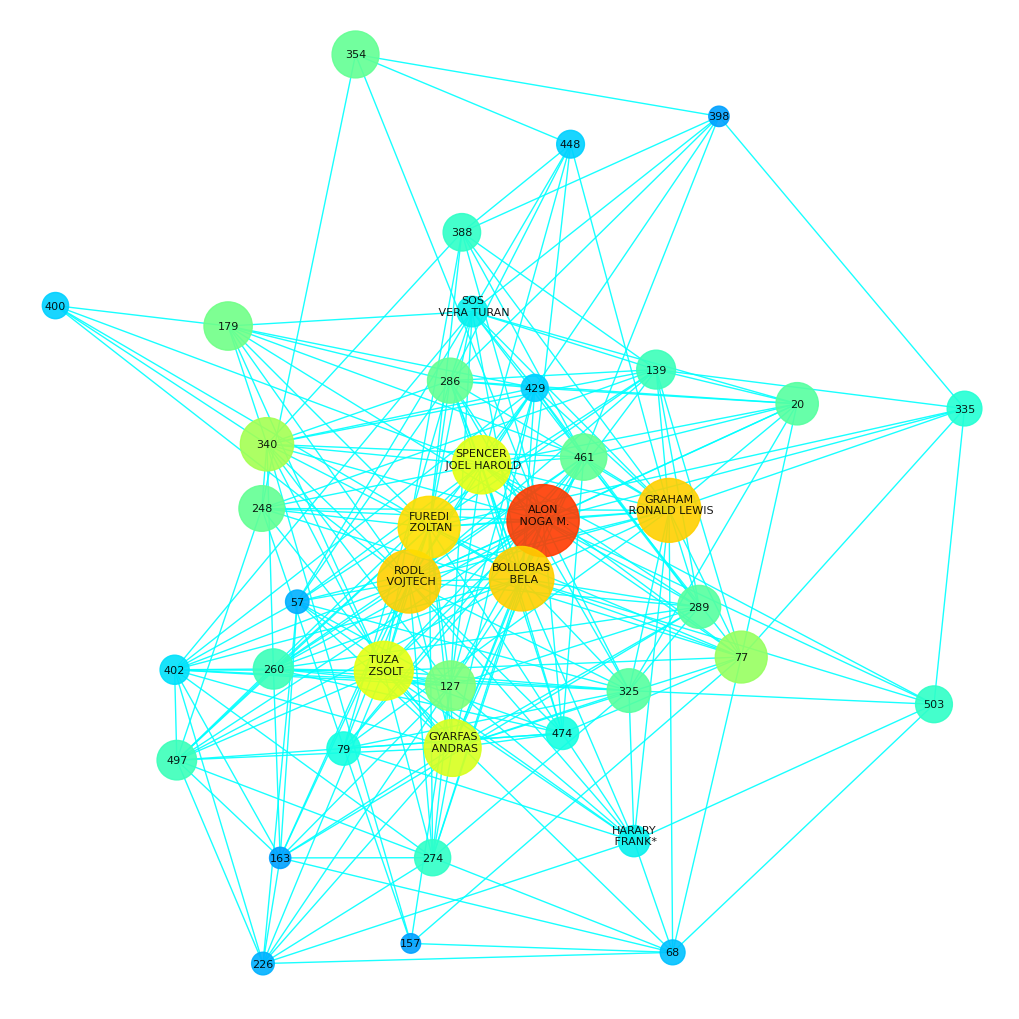

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import heapq
plt.rc('font',family='Times New Roman')
%matplotlib inline

n = 40   # 按照连接度排序最大的30个节点

G = nx.Graph() # 创建一个图

Matrix = A - np.eye(count) # 去掉自环

degree = list(sum(Matrix))
max_number = heapq.nlargest(n, degree) 
max_index = []
for t in max_number:
    index = degree.index(t)
    max_index.append(index)
    degree[index] = 0       # 去重，不让这个节点在进max_index
    
#print(max_number)
#print(max_index)

# 图加边
for i in range(len(max_index)):
    for j in range(len(max_index)):
        if Matrix[max_index[i]][max_index[j]]:
            G.add_edge(max_index[i], max_index[j])


# 计算节点度权重，节点大小
weight = []
for i_d in max_index:
    weight.append(list(sum(Matrix))[i_d])
node_size = np.array(weight)*(np.array(range(n,0,-1))+10)

# ????????????权重差异搞个啥系数？？？？？？？？？？？？？

labels = {}
# 节点标签
with open('Erdos2.txt') as f:
    lines = f.readlines()
    for i in max_index:
        if max_index.index(i) <10:          # 前10个用名字代替
            labels[i] = "\n".join(lines[i].split(','))
        else:
            labels[i] = i
    
    
# 节点颜色
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=max(weight)+10)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
colorList = []
for i in range(len(weight)):
    colorVal = scalarMap.to_rgba(weight[i])   # 在最小值，最大值之间的比例变成rgb颜色
    colorList.append(colorVal)
    

    
plt.figure(figsize=(10,10),dpi=100)
pos = nx.spring_layout(G)    # 定制格式，中心放射型

nx.draw(G,pos,
        node_size=node_size,
        with_labels=True,
        labels=labels,
        alpha=0.9,
        edge_color='aqua',
        node_color=colorList,
        font_size=8)

plt.savefig('figure1.jpg')
plt.show()

## 三大综合指标

In [4]:
G_all = nx.Graph() # 创建一个全部结点的图
G_all.add_nodes_from(range(len(Matrix)))
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        if Matrix[i][j]:
            G_all.add_edge(i,j)


Cd = nx.degree_centrality(G_all)
Cb = nx.betweenness_centrality(G_all)
Cc = nx.closeness_centrality(G_all)

In [5]:
import pandas as pd
Ax = pd.DataFrame([Cd,Cb,Cc],index=['Cd','Cb','Cc'])
Ax

,0,1,2,3,4,5,6,7,8,9,...,501,502,503,504,505,506,507,508,509,510
Cd,0.013725,0.003922,0.001961,0.021569,0.009804,0.017647,0.0,0.029412,0.005882,0.105882,...,0.035294,0.003922,0.043137,0.005882,0.0,0.007843,0.003922,0.001961,0.0,0.001961
Cb,0.002292,0.000407,0.000000,0.003006,0.004619,0.000510,0.0,0.006052,0.000428,0.058575,...,0.006321,0.000000,0.019402,0.000000,0.0,0.002331,0.000000,0.000000,0.0,0.000000
Cc,0.261872,0.252664,0.223849,0.270735,0.267827,0.284544,0.0,0.273353,0.221626,0.356577,...,0.298992,0.159088,0.325131,0.259945,0.0,0.232313,0.236987,0.252514,0.0,0.001961


In [6]:
normal_Ax = Ax.div(Ax.max(axis=1), axis='rows')
normal_Ax

,0,1,2,3,4,5,6,7,8,9,...,501,502,503,504,505,506,507,508,509,510
Cd,0.129630,0.037037,0.018519,0.203704,0.092593,0.166667,0.0,0.277778,0.055556,1.000000,...,0.333333,0.037037,0.407407,0.055556,0.0,0.074074,0.037037,0.018519,0.0,0.018519
Cb,0.031793,0.005645,0.000000,0.041704,0.064074,0.007078,0.0,0.083955,0.005941,0.812631,...,0.087694,0.000000,0.269163,0.000000,0.0,0.032335,0.000000,0.000000,0.0,0.000000
Cc,0.734404,0.708582,0.627772,0.759259,0.751105,0.797987,0.0,0.766602,0.621537,1.000000,...,0.838505,0.446154,0.911810,0.729001,0.0,0.651507,0.664617,0.708160,0.0,0.005499


In [7]:
Dc = np.zeros(len(Matrix))
for i in range(len(Matrix)):
    Dc[i] = np.linalg.norm(normal_Ax.iloc[:,i]-np.array([1,1,1]))

In [8]:
import heapq
n = 15
max_number = heapq.nsmallest(n, Dc) 
max_index = []
Dc_ = list(Dc)
for t in max_number:
    index = Dc_.index(t)
    max_index.append(index)
    Dc_[index] = 0       # 去重，不让这个节点在进max_index
    
print(max_index)
print(max_number)

[9, 186, 437, 43, 147, 164, 478, 354, 448, 340, 179, 377, 439, 248, 384]
[0.18736928563252098, 0.19862403174608712, 0.28000715130432363, 0.33718416566865633, 0.3500236944224716, 0.36830906438124317, 0.48031161101464526, 0.49435654847256466, 0.5417725340158228, 0.5477818341838295, 0.5871621515941333, 0.6797690424231443, 0.7164406888319047, 0.7554660085884727, 0.7938227116020207]


## 特征向量中心性

In [9]:
Ce = nx.eigenvector_centrality_numpy(G_all)
import heapq
n = 15
max_number = heapq.nlargest(n, Ce.values()) 
max_index = []
Ce_ = list(Ce.values())
for t in max_number:
    index = Ce_.index(t)
    max_index.append(index)
    Ce_[index] = 0       # 去重，不让这个节点在进max_index
    
print(max_index)
print(max_number)

[9, 377, 43, 147, 164, 176, 478, 461, 439, 127, 286, 260, 429, 77, 340]
[0.26196066845303606, 0.23191134191686347, 0.21550204000601078, 0.20577012803374672, 0.20030098443568134, 0.18340843458568243, 0.18223240887248138, 0.1778709103659905, 0.17577353025949297, 0.1593090311876724, 0.15204287273873246, 0.15186420980947377, 0.14844993617609853, 0.14784748881292822, 0.14770132153752089]


## 度分布

[ 0.17644703 -0.82944011]


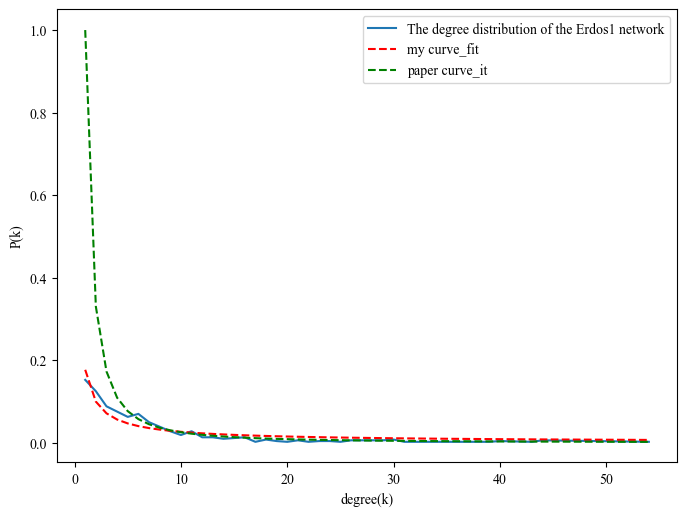

In [10]:
%matplotlib inline
from scipy.optimize import curve_fit
from collections import Counter

degree = nx.degree(G_all)
c = Counter(sorted(dict(degree).values()))
xdata = np.delete(np.array(list(dict(c).keys())),0,axis=0)
ydata = np.delete(np.array(list(dict(c).values()))/(2*G.size()),0,axis=0)

plt.figure(figsize=(8,6),dpi=100)
plt.plot(xdata,ydata)

def fund(x,a,b):
    return a*(x**b)


popt, pcov = curve_fit(fund, xdata, ydata,maxfev=10000)

y1 = [fund(i, popt[0],popt[1]) for i in xdata]
plt.plot(xdata,y1,'r--')
print(popt)


y2 = xdata**(-1.6)
plt.plot(xdata,y2,"g--")


plt.xlabel('degree(k)')
plt.ylabel('P(k)')
plt.legend(["The degree distribution of the Erdos1 network","my curve_fit",'paper curve_it'])
plt.savefig('figure2.png')
plt.show()

[ 0.17644703 -0.82944011]


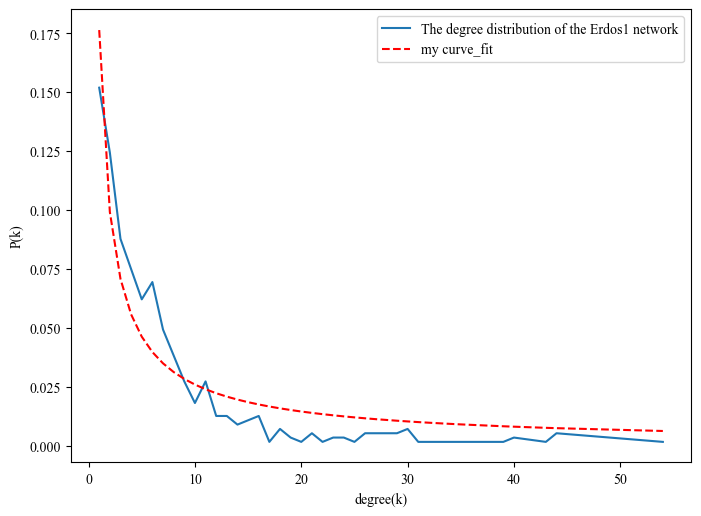

In [11]:
%matplotlib inline
from scipy.optimize import curve_fit
from collections import Counter

degree = nx.degree(G_all)
c = Counter(sorted(dict(degree).values()))
xdata = np.delete(np.array(list(dict(c).keys())),0,axis=0)
ydata = np.delete(np.array(list(dict(c).values()))/(2*G.size()),0,axis=0)

plt.figure(figsize=(8,6),dpi=100)
plt.plot(xdata,ydata)

def fund(x,a,b):
    return a*(x**b)


popt, pcov = curve_fit(fund, xdata, ydata,maxfev=10000)

y1 = [fund(i, popt[0],popt[1]) for i in xdata]
plt.plot(xdata,y1,'r--')
print(popt)


plt.xlabel('degree(k)')
plt.ylabel('P(k)')
plt.legend(["The degree distribution of the Erdos1 network","my curve_fit"])
plt.savefig('figure3.png')
plt.show()